合并经典被注释的小肽，非经典的小肽

预期的输出是

- 注释的小肽+非经典被所有肽段支持的小肽+非经典相同数量的负对照小肽
- 预期的输出是注释的小肽+非经典被特异性肽段支持的小肽+非经典相同数量的负对照小肽

In [1]:
source("/home/user/data2/lit/bin/lit_utils.R")
source("/home/user/data3/lit/project/sORFs/sORFs.utils.R")
lib_text()

In [2]:
cano.sep.path <- "../processed/ms_res/cano.sep.tab.info.add.ms.txt"
noncano.sep.ms.suppo.path <- "../processed/ms_res/noncano.sep.ms.supported.tab.info.txt"
noncano.sep.ms.not.suppo.path <- "../processed/tab_info/noncano.sep.ms.not.supported.tab.info.txt"

In [3]:
fread_c(cano.sep.path) -> cano.sep
fread_c(noncano.sep.ms.suppo.path) -> noncano.sep.ms.suppo
fread_c(noncano.sep.ms.not.suppo.path) -> noncano.sep.ms.not.suppo

In [4]:
colnames(cano.sep) -> cols
cols
head(cano.sep,1) %>% print()
setdiff(colnames(cano.sep),colnames(noncano.sep.ms.suppo))
setdiff(colnames(noncano.sep.ms.suppo),colnames(cano.sep))
setdiff(colnames(noncano.sep.ms.suppo),colnames(noncano.sep.ms.not.suppo))

[1] "Uniprot_id"       "ENS_id"           "Seq"              "Length"          
 [5] "Chr"              "Strand"           "Start"            "End"             
 [9] "ORF_id_trans"     "ORF_id_seq"       "Scodon"           "Type"            
[13] "ORF_type_1"       "ORF_type_2"       "ORF_type_3"       "Gene_ID"         
[17] "Transcript_type"  "Gene_type"        "Gene_name"        "CDS_start"       
[21] "CDS_end"          "PE_type"          "All_psm_n"        "All_peptide_n"   
[25] "Unique_psm_n"     "Unique_peptide_n"

                 Uniprot_id            ENS_id
1 sp|A0A024R1R8|TMA7B_HUMAN ENST00000424496.3
                                                               Seq Length   Chr
1 MSSHEGGKKKALKQPKKQAKEMDEEEKAFKQKQKEEQKKLEVLKAKVVGKGPLATGGIKKSGKK     64 chr22
  Strand    Start      End                              ORF_id_trans
1      + 39964374 39964569 ENST00000424496.3+chr22:39964374-39964569
                                                                                 ORF_id_seq
1 +chr22:39964374-39964569:MSSHEGGKKKALKQPKKQAKEMDEEEKAFKQKQKEEQKKLEVLKAKVVGKGPLATGGIKKSGKK
  Scodon      Type ORF_type_1 ORF_type_2 ORF_type_3           Gene_ID
1    ATG Canonical  Canonical  Canonical  Canonical ENSG00000225528.4
  Transcript_type      Gene_type       Gene_name CDS_start  CDS_end PE_type
1  protein_coding protein_coding ENSG00000225528  39964374 39964569    PE_3
  All_psm_n All_peptide_n Unique_psm_n Unique_peptide_n
1       178             4            0                0


[1] "Uniprot_id" "PE_type"

[1] "i.ORF_id_seq"

[1] "All_psm_n"        "All_peptide_n"    "Unique_psm_n"     "Unique_peptide_n"
[5] "i.ORF_id_seq"

In [5]:
noncano.sep.ms.suppo %>% mutate(Uniprot_id=ORF_id_trans,PE_type=NA,i.ORF_id_seq=NULL) -> noncano.sep.ms.suppo
noncano.sep.ms.not.suppo %>% mutate(Uniprot_id=ORF_id_trans,PE_type=NA) %>% mutate(All_psm_n=0,
                                                                         All_peptide_n=0,
                                                                         Unique_psm_n=0,
                                                                        Unique_peptide_n=0) -> noncano.sep.ms.not.suppo

In [6]:
rbind(cano.sep,
     noncano.sep.ms.not.suppo[,cols],
     noncano.sep.ms.suppo[,cols]) -> sep_combined
create_path("../processed/sep_combined/")
fwrite_c(sep_combined,"../processed/sep_combined/sep_combined.txt")

In [7]:
noncano.sep.ms.suppo[,cols] %>% filter(Unique_psm_n>0) -> noncano.sep.ms.suppo.unique
nrow(noncano.sep.ms.suppo.unique)
nrow(cano.sep)
set.seed(123)
sample(1:nrow(noncano.sep.ms.not.suppo),nrow(noncano.sep.ms.suppo.unique)) ->  sample_rows
noncano.sep.ms.not.suppo[sample_rows,] -> noncano.sep.ms.not.suppo.sampled
rbind(cano.sep,
     noncano.sep.ms.not.suppo.sampled[,cols],
     noncano.sep.ms.suppo.unique) -> sep_combined
create_path("../processed/sep_combined/")
fwrite_c(sep_combined,"../processed/sep_combined/sep_combined_unique.txt")

[1] 2141

[1] 3243

In [14]:
filter(sep_combined,Type=="Canonical")  %>% .$Length %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    92.0   114.0   109.6   131.0   150.0 

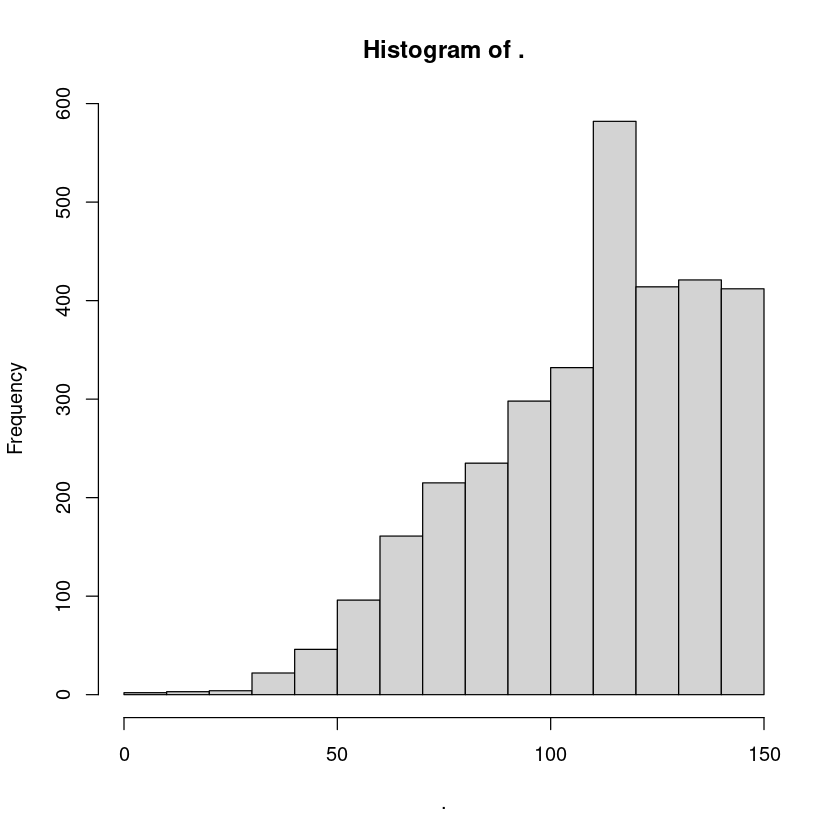

In [19]:
filter(sep_combined,Type=="Canonical")  %>% .$Length %>% hist()

In [22]:
filter(sep_combined,Length<20 & PE_type=="PE_1")

,Uniprot_id,ENS_id,Seq,Length,Chr,Strand,Start,End,ORF_id_trans,ORF_id_seq,⋯,Transcript_type,Gene_type,Gene_name,CDS_start,CDS_end,PE_type,All_psm_n,All_peptide_n,Unique_psm_n,Unique_peptide_n
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
95,sp|A0A0B4J200|TJB23_HUMAN,ENST00000390415.1,STDTQYFGPGTRLTVL,16,chr7,+,142796846,142796895,ENST00000390415.1+chr7:142796846-142796895,+chr7:142796846-142796895:STDTQYFGPGTRLTVL,⋯,TR_J_gene,TR_J_gene,TRBJ2-3,142796846,142796895,PE_1,0,0,0,0


In [8]:
noncano.sep.ms.suppo %>% filter(Unique_psm_n>0) %>% nrow()

[1] 2141

In [9]:
table(noncano.sep.ms.suppo.unique$ORF_type_3)


           Canonical                doORF                 dORF 
                   3                   13                  110 
           Extension             Internal               lncRNA 
                   1                   47                   97 
         ncORF_other     ncORF_pseudogene processed_transcript 
                   2                  310                  128 
     retained_intron           Truncation                uoORF 
                 279                 1114                    7 
                uORF 
                  30 